# 데이터 불균형

[Machine Learning Imbalanced Data(불균형 데이터)](https://shinminyong.tistory.com/34)

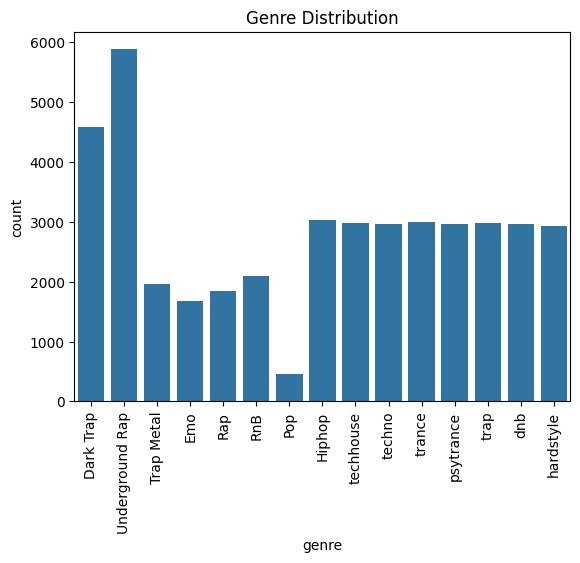

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE
from imblearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

In [3]:
file_path = "./input/genres_v2.csv"

df = pd.read_csv(file_path, low_memory=False)
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title', 'key', 'mode', 'time_signature'], axis=1)

df_y = df['genre']
df_x = df.drop(['genre'], axis=1)
label_encoder = LabelEncoder()

df_y_encoded = label_encoder.fit_transform(df_y)

original_labels = label_encoder.classes_

df_y = df_y_encoded

In [4]:
def report(y_test, pred, label_encoder):
    '''
    accuracy, report, matrix
    '''
    print(f"accuracy score: {accuracy_score(y_test, pred)}")
    print(classification_report(y_test, pred))
    
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

## Random UnderSampling

In [5]:
z_scores = np.abs(zscore(df_x))

threshold = 3.0
outliers = np.where(z_scores > threshold)

outliers_indices = np.unique(outliers[0])
df_x_imputed = df_x.copy()

for idx in outliers_indices:
    class_label = df_y[idx]
    df_x_imputed.iloc[idx] = df_x[df_y == class_label].mean()

rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
rus_x, rus_y = rus.fit_resample(df_x, df_y)

X_train, X_test, y_train, y_test = train_test_split(rus_x, rus_y, test_size=0.2, shuffle=True, random_state=1, stratify=rus_y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1, stratify=y_train)

accuracy score: 0.6374724716245976
              precision    recall  f1-score   support

           0       0.43      0.44      0.44       732
           1       0.49      0.49      0.49       269
           2       0.40      0.39      0.40       484
           3       0.19      0.24      0.21        74
           4       0.46      0.42      0.44       295
           5       0.30      0.29      0.29       336
           6       0.30      0.29      0.30       313
           7       0.05      0.05      0.05        74
           8       0.95      0.95      0.95       475
           9       0.82      0.85      0.83       470
          10       0.86      0.87      0.87       474
          11       0.83      0.89      0.86       476
          12       0.80      0.77      0.78       473
          13       0.77      0.79      0.78       480
          14       0.78      0.76      0.77       478

    accuracy                           0.64      5903
   macro avg       0.56      0.57      0.56  

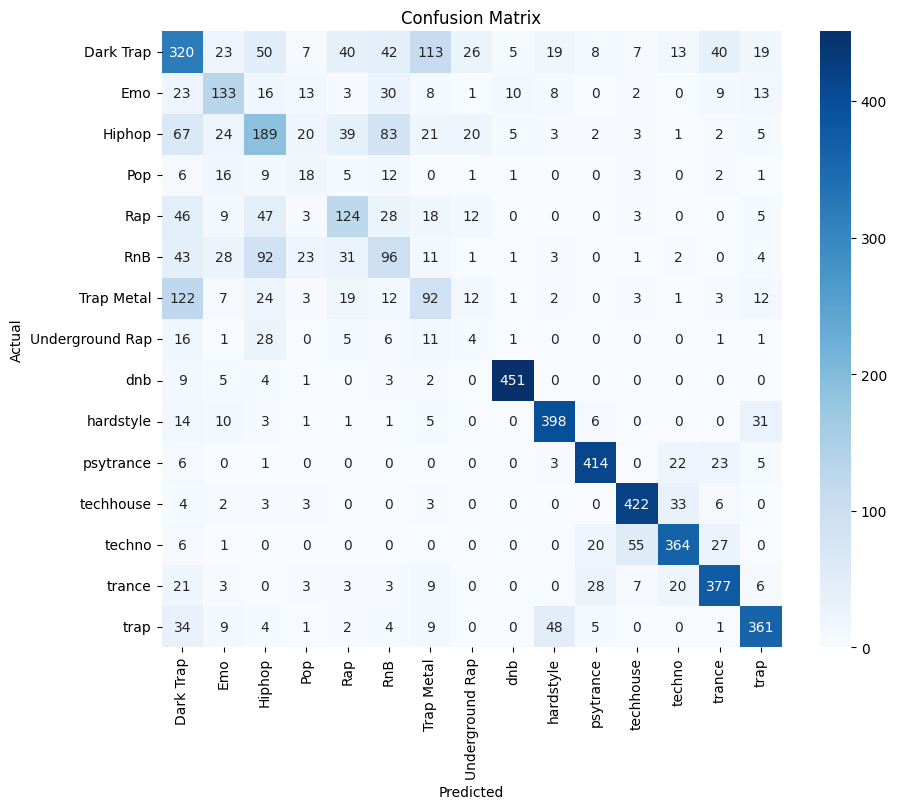

In [6]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)
report(y_val, pred_val, label_encoder)

accuracy score: 0.6376202737498305
              precision    recall  f1-score   support

           0       0.44      0.44      0.44       916
           1       0.54      0.51      0.53       336
           2       0.42      0.44      0.43       606
           3       0.18      0.22      0.20        92
           4       0.42      0.42      0.42       370
           5       0.30      0.26      0.28       420
           6       0.28      0.27      0.28       391
           7       0.03      0.03      0.03        92
           8       0.95      0.94      0.95       593
           9       0.86      0.87      0.86       587
          10       0.86      0.88      0.87       592
          11       0.82      0.84      0.83       595
          12       0.77      0.75      0.76       591
          13       0.74      0.75      0.75       600
          14       0.79      0.82      0.80       598

    accuracy                           0.64      7379
   macro avg       0.56      0.56      0.56  

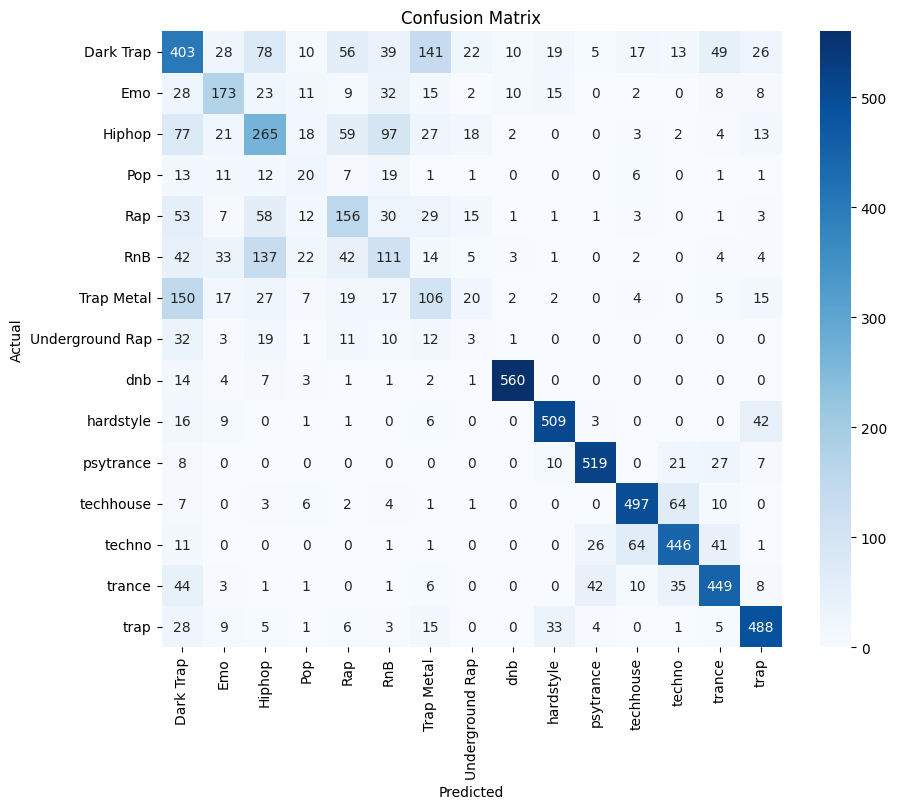

In [7]:
pred_test = model.predict(X_test)
report(y_test, pred_test, label_encoder)

Underground Rap의 성능이 너무 낮아짐

## SMOTE

과제 제출했을 때 성능이 많이 향상된 줄 알았지만 train, val, test에도 적용해서 성능이 엄청나게 좋아보였던 것이다.

정확한 방식인 현재는 accuracy score가 향상되지는 않았지만 갯수가 적은 pop 클래스의 성능이 아주 살짝 좋아짐

accuracy score: 0.5908285072686443
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       916
           1       0.53      0.62      0.57       336
           2       0.36      0.41      0.38       606
           3       0.10      0.23      0.14        92
           4       0.31      0.39      0.34       370
           5       0.32      0.32      0.32       420
           6       0.21      0.30      0.25       391
           7       0.42      0.27      0.33      1175
           8       0.96      0.94      0.95       593
           9       0.84      0.81      0.83       587
          10       0.89      0.89      0.89       592
          11       0.84      0.87      0.86       595
          12       0.81      0.81      0.81       591
          13       0.79      0.73      0.76       600
          14       0.78      0.73      0.76       597

    accuracy                           0.59      8461
   macro avg       0.57      0.58      0.57  

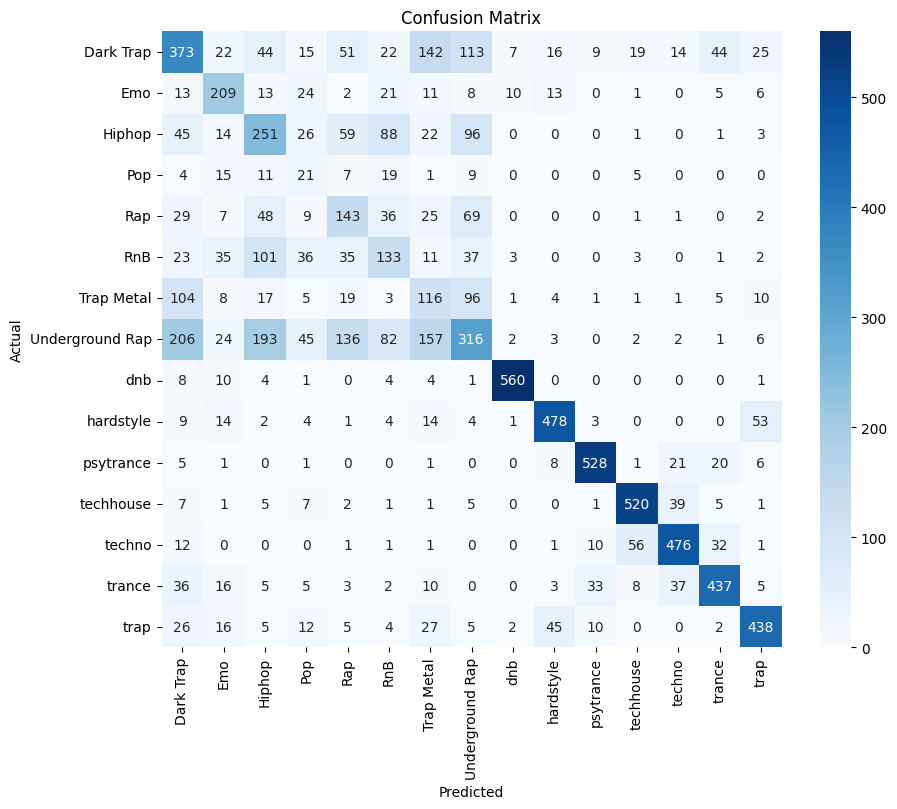

In [8]:
z_scores = np.abs(zscore(df_x))
threshold = 3.0
outliers = np.where(z_scores > threshold)
outliers_indices = np.unique(outliers[0])

df_x_imputed = df_x.copy()
for idx in outliers_indices:
    class_label = df_y_encoded[idx]
    df_x_imputed.iloc[idx] = df_x[df_y == class_label].mean()

X_train, X_test, y_train, y_test = train_test_split(df_x_imputed, df_y_encoded, test_size=0.2, shuffle=True, random_state=1, stratify=df_y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1, stratify=y_train)

smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=1)

pipeline = Pipeline([('smote', smote), ('model', model)])

pipeline.fit(X_train_resampled, y_train_resampled)

y_hat = pipeline.predict(X_test)

report(y_test, y_hat, label_encoder)